# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview

combined_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice
number_of_mice = combined_df["Mouse ID"].nunique()
print(number_of_mice)

249


In [37]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_counts = combined_df.groupby(['Mouse ID', 'Timepoint']).size()

# Find duplicate groups by checking counts greater than 1
duplicate_mice = duplicate_counts[duplicate_counts > 1]

# Extract just the Mouse IDs of the duplicates
duplicate_mouse_ids = duplicate_mice.index.get_level_values('Mouse ID').unique()

print("Duplicate Mouse IDs:", duplicate_mouse_ids)


Duplicate Mouse IDs: Index(['g989'], dtype='object', name='Mouse ID')


In [38]:
# Optional: Get all the data for the duplicate mouse ID.


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = clean_df["Mouse ID"].nunique()
print(number_of_mice_cleaned)

248


## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

# Group by Drug Regimen
grouped = clean_df.groupby("Drug Regimen")

# Calculate the summary statistics
summary_df = grouped["Tumor Volume (mm3)"].agg(
    Mean="mean",
    Median="median",
    Variance="var",
    Std_Dev="std",
    SEM="sem"
)
summary_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

## Bar and Pie Charts

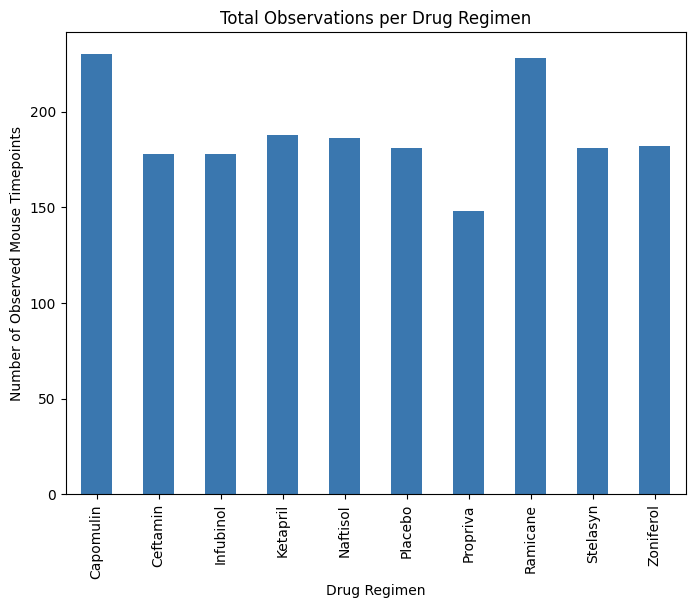

In [43]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# group the clean_df by "Drug Regimen" and count the number of rows (Mouse ID/Timepoints) for each regimen.
# Group by Drug Regimen and count rows
drug_group = clean_df.groupby('Drug Regimen')
drug_group_count = drug_group.size()

# Plot the bar chart
Bar1 = drug_group_count.plot(
    kind="bar",
    color="#3A77AF",
    figsize=(8, 6)
)

# Set labels for the axes
Bar1.set_xlabel("Drug Regimen")
Bar1.set_ylabel("Number of Observed Mouse Timepoints")
Bar1.set_title("Total Observations per Drug Regimen")

# Show the plot
plt.show()



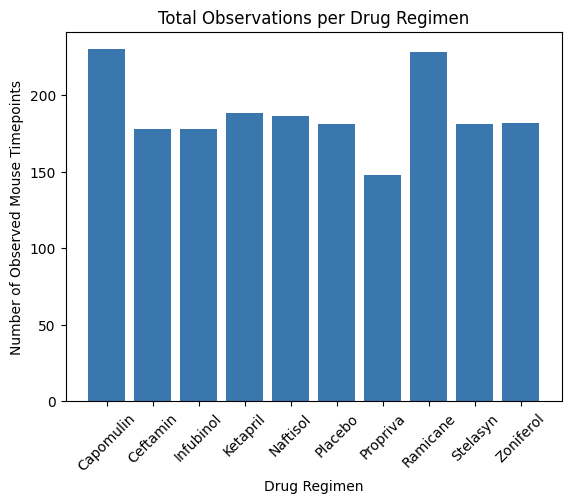

In [44]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Iterate over the grouped data to extract drug regimens and mouse counts
drug_regimens = []  # To store the x-axis labels
mouse_counts = []   # To store the y-axis values

for drug, count in drug_group_count.items():
    drug_regimens.append(drug)  # Append the drug name (index)
    mouse_counts.append(count)  # Append the count (value)

# Plot the bar chart using PyPlot
plt.bar(drug_regimens, mouse_counts, color="#3A77AF")

# Set labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")
plt.title("Total Observations per Drug Regimen")
plt.xticks(rotation=45)

# Show the plot
plt.show()


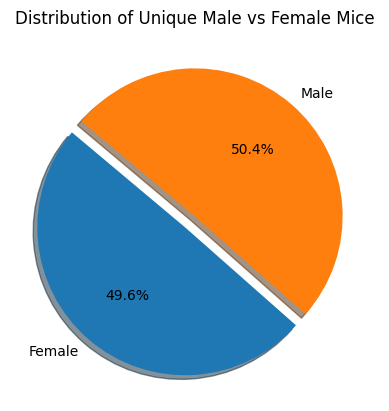

In [49]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Plot the bar chart
# Get the unique mice with their gender
# Make the pie chart
gender_counts = clean_df.groupby("Sex")["Mouse ID"].nunique()

sizes = gender_counts.values  # Counts of males and females
labels = gender_counts.index  # 'Male' and 'Female'

plt.pie(
    sizes, 
    labels=labels, 
    autopct="%1.1f%%",  # Show percentages
    shadow=True, 
    startangle=140, 
    explode=(0.1, 0)  # Optionally separate one slice
)

plt.title("Distribution of Unique Male vs Female Mice")
plt.show()

In [48]:
print(clean_df.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [51]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender

gender_counts = clean_df.groupby("Sex")["Mouse ID"].nunique()

gender_counts

#labels = ["Female", "Male"]
#colors = ["#3A77AF", "Orange"]




# Make the pie chart
#plt.title("Distribution of Unique Male vs Female Mice")
#plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

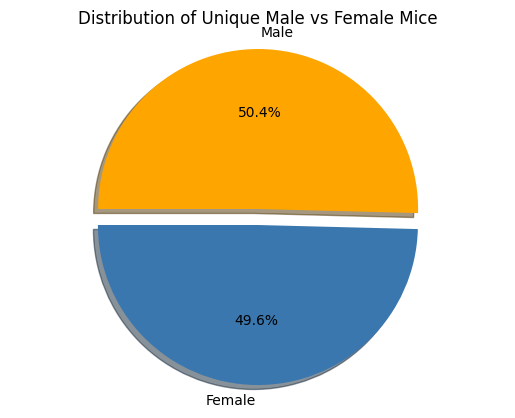

In [54]:
sizes = [123 , 125]
labels = ["Female", "Male"]
colors = ["#3A77AF", "Orange"]
explode = (0.1,0)

plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%" , shadow=True, startangle =180)
plt.axis("equal")
plt.title("Distribution of Unique Male vs Female Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

latest_timepoints = clean_df.groupby("Mouse ID")["Timepoint"].max()

# Convert to DataFrame
latest_timepoints = latest_timepoints.reset_index()

# Merge with the original dataframe to get tumor volume
merged_df = latest_timepoints.merge(
    clean_df, 
    on=["Mouse ID", "Timepoint"], 
    how="inner"
)

# Extract tumor volumes
tumor_volumes = merged_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]

# Display results
print(tumor_volumes)


    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0       a203    Infubinol         45           67.973419
1       a251    Infubinol         45           65.525743
2       a262      Placebo         45           70.717621
3       a275     Ceftamin         45           62.999356
4       a366     Stelasyn         30           63.440686
..       ...          ...        ...                 ...
243     z435     Propriva         10           48.710661
244     z578     Ramicane         45           30.638696
245     z581    Infubinol         45           62.754451
246     z795     Naftisol         45           65.741070
247     z969     Naftisol         45           73.867845

[248 rows x 4 columns]


In [58]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

# Filter for the four meds
four_treatments_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Display dataframe
print(four_treatments_df.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [59]:
# Create an empty list to hold tumor volume data
tumor_vol_data = []

# List of the four treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Loop through each treatment
for treatment in treatments:
    # Filter the rows for the current treatment
    treatment_data = four_treatments_df[four_treatments_df["Drug Regimen"] == treatment]
    
    # Extract the tumor volume column
    tumor_volumes = treatment_data["Tumor Volume (mm3)"]
    
    # Append the tumor volume data as a list
    tumor_vol_data.append(tumor_volumes.tolist())

tumor_vol_data

[[45.0,
  43.87849569,
  37.61494768,
  38.17723195,
  36.86687576,
  33.94994037,
  32.95967078,
  28.32853059,
  25.47214326,
  23.34359787,
  45.0,
  45.47375302,
  39.11389068,
  39.77625003,
  36.06583471,
  36.61712031,
  32.91529186,
  30.20682488,
  28.16739732,
  28.48403281,
  45.0,
  41.40859145,
  36.82536664,
  35.46461175,
  34.2557317,
  33.11875607,
  31.75827491,
  30.83435704,
  31.3780453,
  28.43096411,
  45.0,
  38.79647373,
  35.6244027,
  32.62300253,
  30.48598484,
  45.0,
  45.76088647,
  46.56841719,
  47.21219992,
  40.34394812,
  35.50361557,
  35.9783344,
  35.45948978,
  36.02413752,
  31.02392294,
  45.0,
  41.01991315,
  41.63001026,
  42.28366512,
  40.71642815,
  38.9927339,
  35.72602314,
  36.3278696,
  31.47541076,
  31.8962384,
  45.0,
  45.78174579,
  39.0054935,
  35.46375763,
  36.01558858,
  33.89334515,
  32.68065459,
  33.06933705,
  31.80484133,
  32.37735684,
  45.0,
  45.62238149,
  46.4145177,
  39.80445341,
  38.90934919,
  37.69543154,


In [60]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Loop through the tumor volumes for each treatment
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

# Loop through the tumor volumes for each treatment
for i, treatment in enumerate(treatments):
    # Extract tumor volume data for the current treatment
    data = tumor_vol_data[i]
    
    # Convert to pandas Series for easier calculations
    data_series = pd.Series(data)
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data_series.quantile(0.25)
    Q3 = data_series.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data_series[(data_series < lower_bound) | (data_series > upper_bound)]
    
    # Print results
    print(f"{treatment}: Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"{treatment}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"{treatment}'s potential outliers: {outliers.tolist()}")



Capomulin: Q1 = 37.685932865, Q3 = 45.0, IQR = 7.314067135000002
Capomulin: Lower Bound = 26.714832162499995, Upper Bound = 55.9711007025
Capomulin's potential outliers: [25.47214326, 23.34359787]
Ramicane: Q1 = 36.674634585, Q3 = 45.0, IQR = 8.325365415
Ramicane: Lower Bound = 24.1865864625, Upper Bound = 57.488048122500004
Ramicane's potential outliers: [22.05012627]
Infubinol: Q1 = 47.3123533, Q3 = 57.314443967500004, IQR = 10.002090667500006
Infubinol: Lower Bound = 32.309217298749985, Upper Bound = 72.31757996875001
Infubinol's potential outliers: []
Ceftamin: Q1 = 47.2084271125, Q3 = 56.801437570000004, IQR = 9.593010457500007
Ceftamin: Lower Bound = 32.81891142624998, Upper Bound = 71.19095325625001
Ceftamin's potential outliers: []


/var/folders/8h/18zjmvsj1vdf7qmj8mylhwmc0000gn/T/ipykernel_25870/4230532566.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels=treatments, flierprops={"markerfacecolor": "red", "markersize": 10})


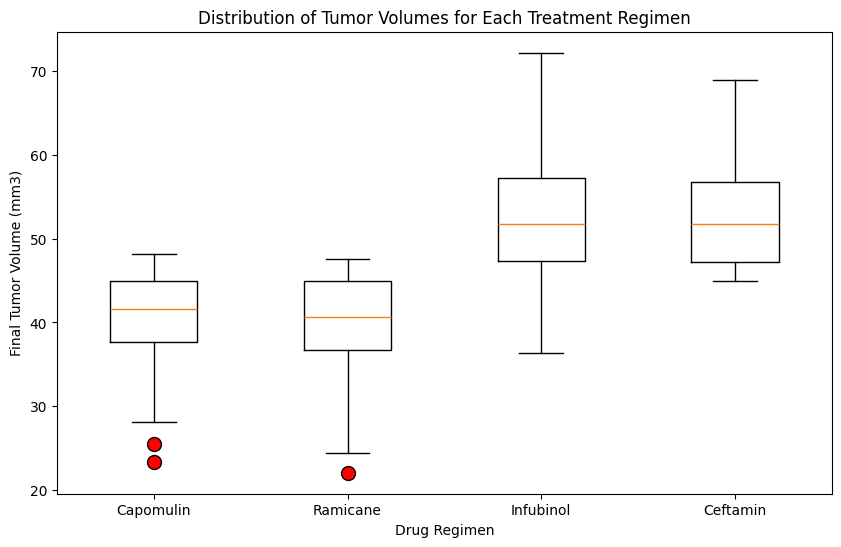

In [61]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops={"markerfacecolor": "red", "markersize": 10})

# Add a title and labels
plt.title("Distribution of Tumor Volumes for Each Treatment Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

# Show the plot
plt.show()


## Line and Scatter Plots

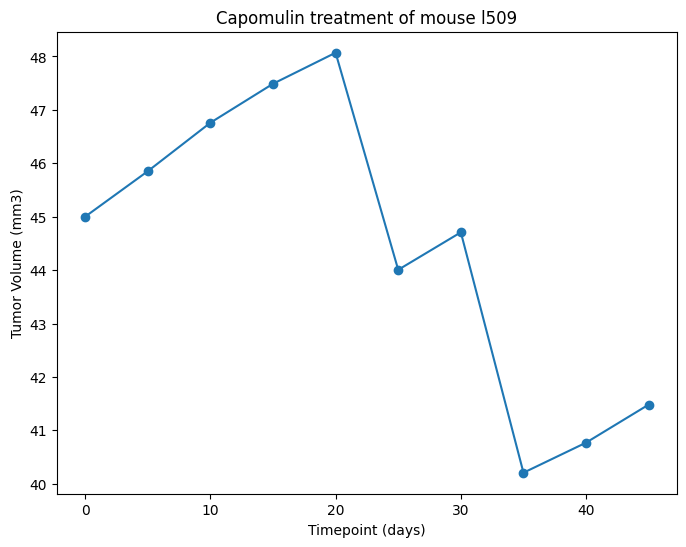

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for the specific mouse treated with Capomulin
mouse_id = "l509"  # Replace with the correct Mouse ID
mouse_data = clean_df[clean_df["Mouse ID"] == mouse_id]

# Extract Timepoint (x-axis) and Tumor Volume (mm3) (y-axis)
timepoints = mouse_data["Timepoint"]
tumor_volumes = mouse_data["Tumor Volume (mm3)"]

# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(timepoints, tumor_volumes, marker="o")

# Add titles and labels
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()


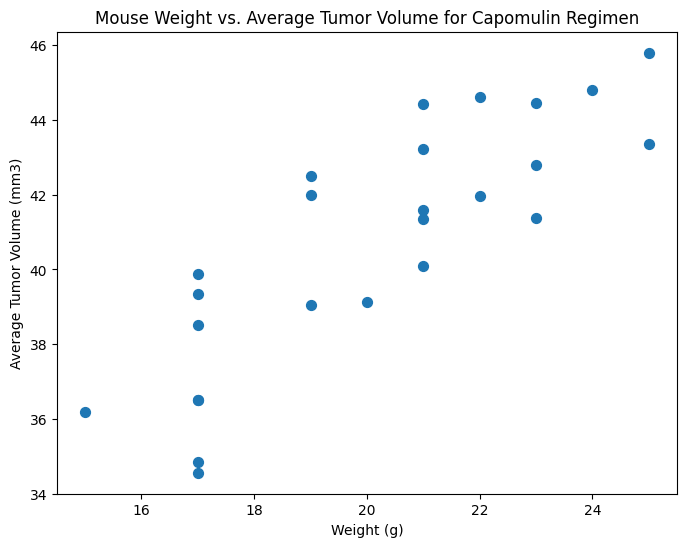

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Filter Capomulin 
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Group by Mouse ID and get average tumor volume
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Extract Mouse Weight from the first entry
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

# Put data into a single DataFrame
scatter_data = pd.DataFrame({
    "Weight (g)": mouse_weight,
    "Average Tumor Volume (mm3)": avg_tumor_volume
})

# plot
plt.figure(figsize=(8, 6))
plt.scatter(scatter_data["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"], s=50)
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import numpy as np

# Calculate the correlation coefficient
correlation = np.corrcoef(scatter_data["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"])[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


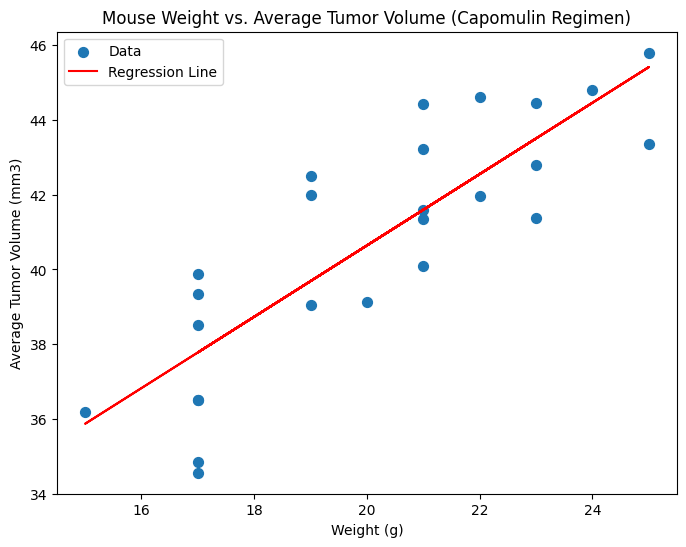

In [70]:
# Plot the scatter plot
# Import linregress
from scipy.stats import linregress

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(
    scatter_data["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"]
)

# Calculate the regression line
regression_line = slope * scatter_data["Weight (g)"] + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))

# Scatter plot of the data
plt.scatter(scatter_data["Weight (g)"], scatter_data["Average Tumor Volume (mm3)"], s=50, label="Data")

# Regression line
plt.plot(scatter_data["Weight (g)"], regression_line, color="red", label="Regression Line")

# Add titles and labels
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.show()
